In [ ]:
from tensorflow.keras import Sequential,datasets
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

In [ ]:
y_train = y_train.reshape(-1,)

In [ ]:
y_classes = ["quan","automobile","bird","cat","deer","dog","frog","hourse","ship","truck"]

In [ ]:
def showImage(x,y,index):
  plt.figure(figsize=(5,2))
  plt.imshow(x[index])
  plt.xlabel(y_classes[y[index]])

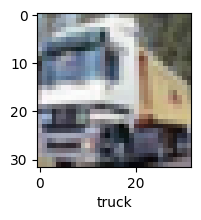

In [ ]:
showImage(X_train, y_train, 1)

In [ ]:
X_train = X_train/255
X_test = X_test/255

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation="relu",input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size=(4,4), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=34, activation = "relu"))
model.add(Dense(units=10, activation = "softmax"))

In [ ]:
model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",

    metrics=["accuracy"]
)

In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,y_test), epochs=5)

Epoch 1/5
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4272 - accuracy: 0.4845 - val_loss: 1.1390 - val_accuracy: 0.5995
Epoch 2/5
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0422 - accuracy: 0.6372 - val_loss: 1.0284 - val_accuracy: 0.6392
Epoch 3/5
1563/1563 [==============================] - 7s 5ms/step - loss: 0.9202 - accuracy: 0.6802 - val_loss: 0.9372 - val_accuracy: 0.6746
Epoch 4/5
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8428 - accuracy: 0.7088 - val_loss: 0.9504 - val_accuracy: 0.6701
Epoch 5/5
1563/1563 [==============================] - 7s 4ms/step - loss: 0.7815 - accuracy: 0.7293 - val_loss: 0.8664 - val_accuracy: 0.7078


In [ ]:
y_predictions = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
y_predictions = [np.argmax(arr) for arr in y_predictions]

In [ ]:
y_test = y_test.reshape(-1,)

<ipython-input-36-1adb07000b8e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(5,2))


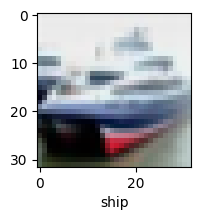

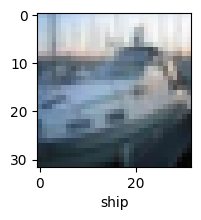

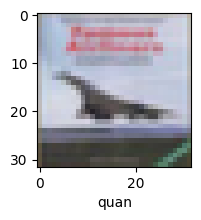

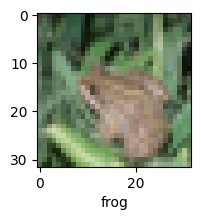

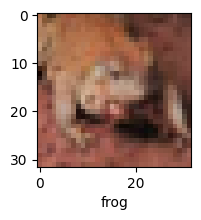

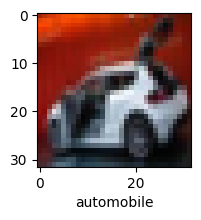

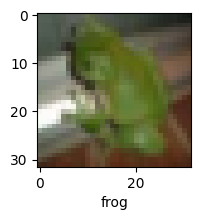

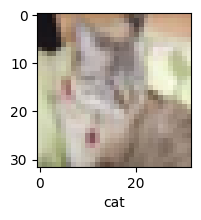

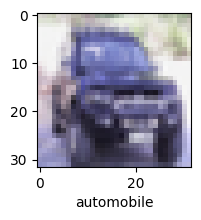

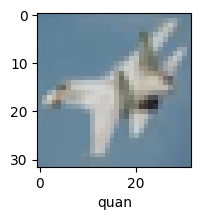

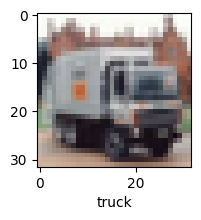

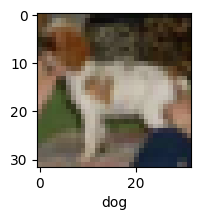

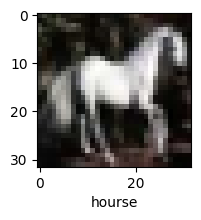

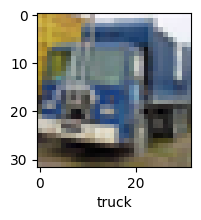

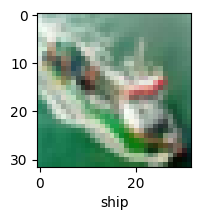

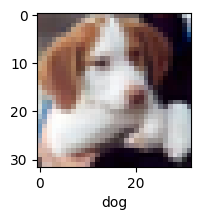

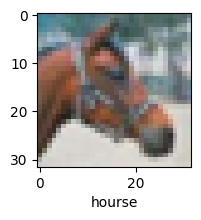

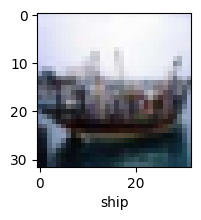

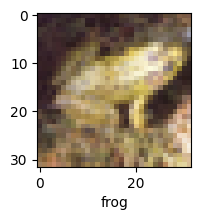

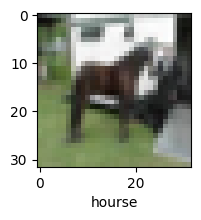

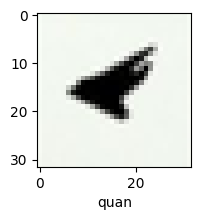

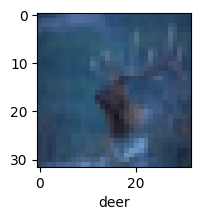

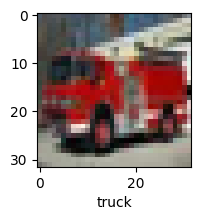

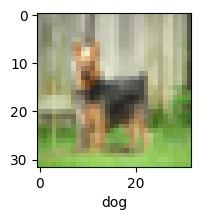

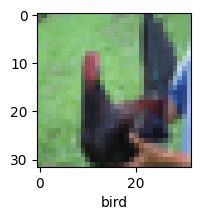

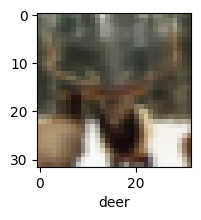

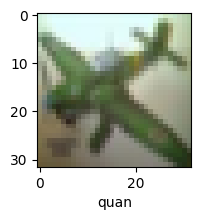

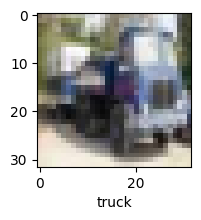

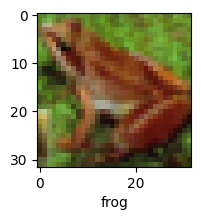

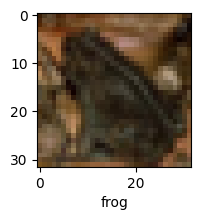

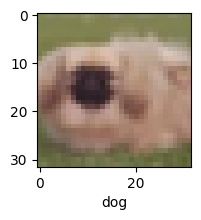

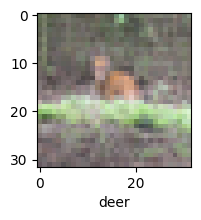

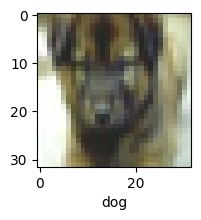

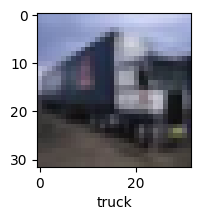

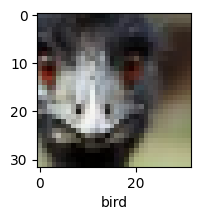

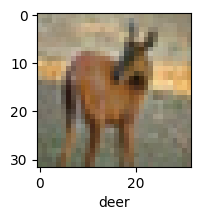

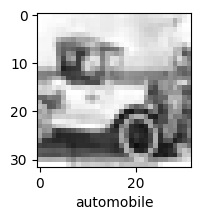

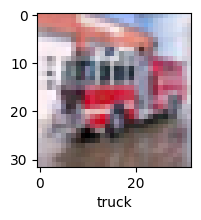

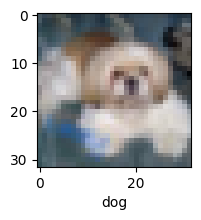

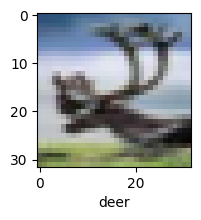

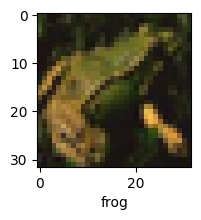

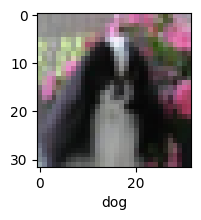

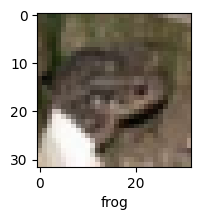

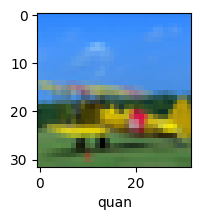

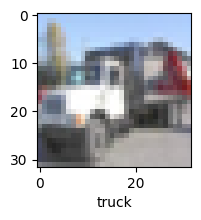

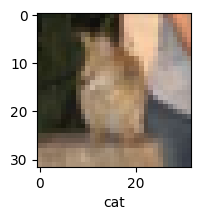

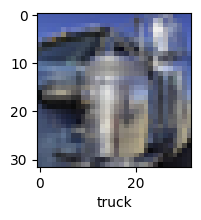

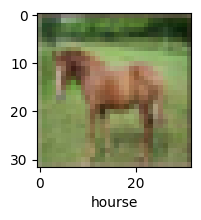

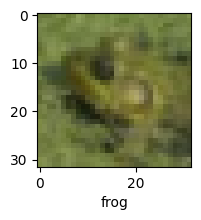

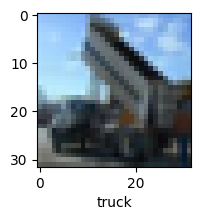

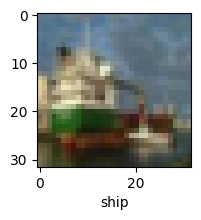

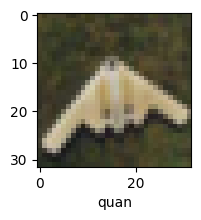

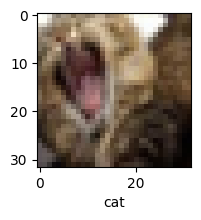

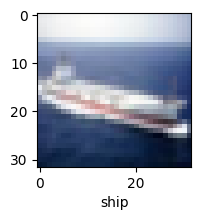

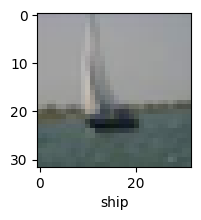

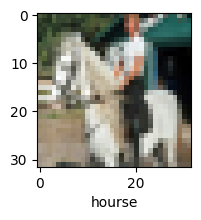

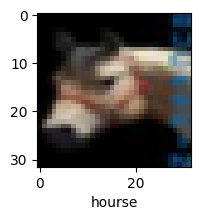

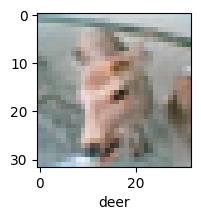

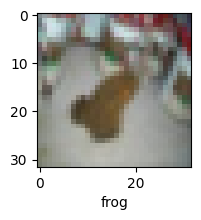

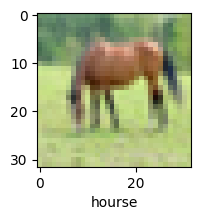

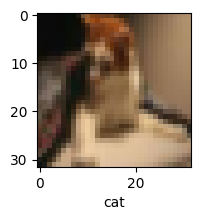

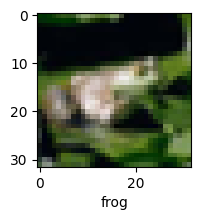

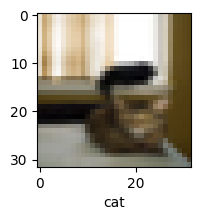

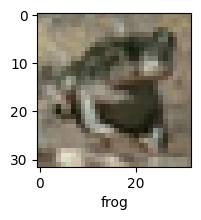

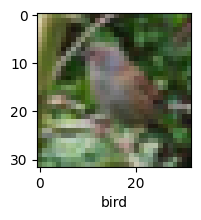

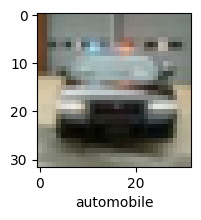

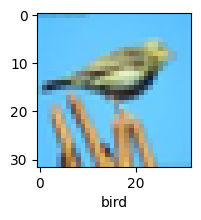

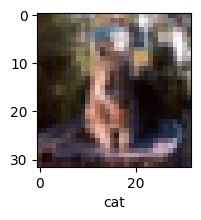

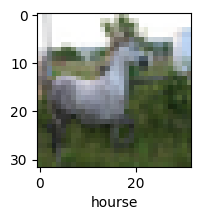

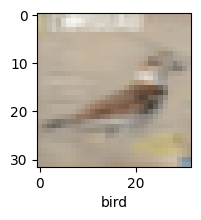

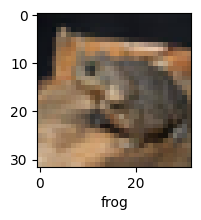

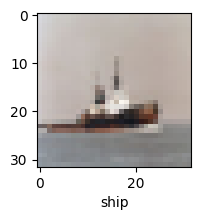

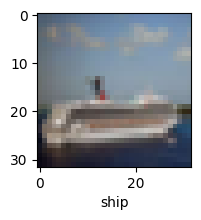

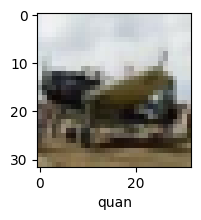

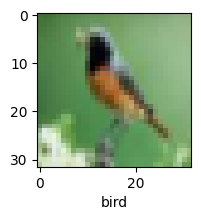

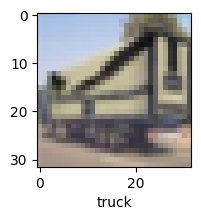

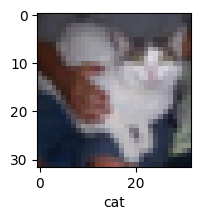

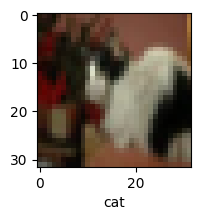

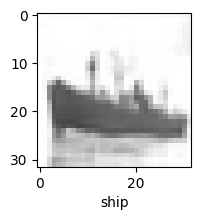

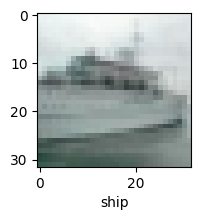

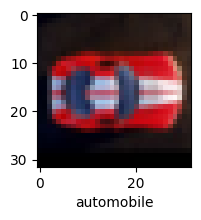

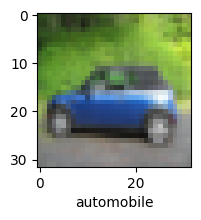

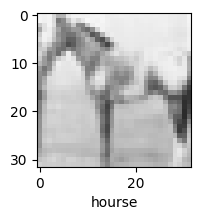

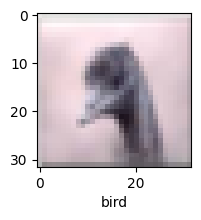

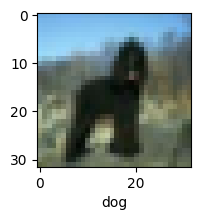

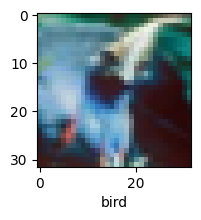

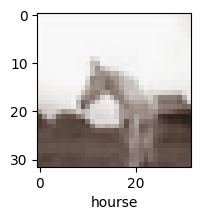

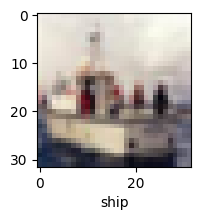

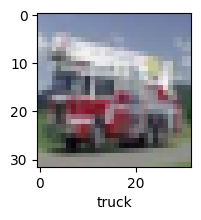

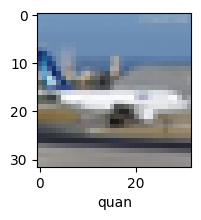

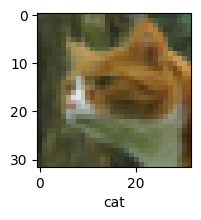

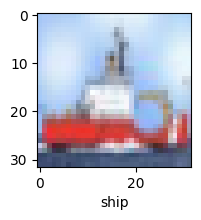

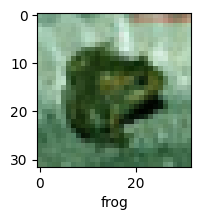

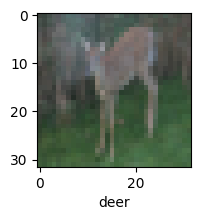

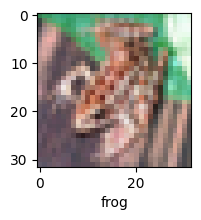

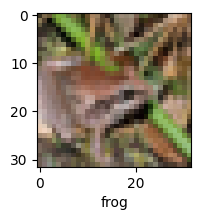

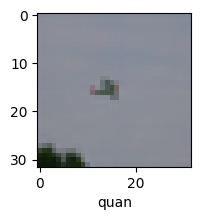

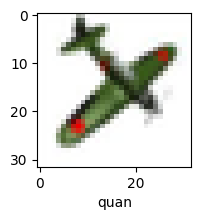

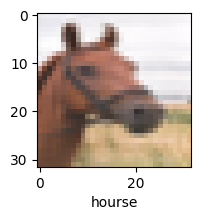

In [ ]:
for i in range(1,100):
  showImage(X_test,y_test,i)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predictions)
print(cm)

[[706  19  79  20  32   3   9   8  87  37]
 [ 25 803  10   7   4   2   9   3  40  97]
 [ 43   5 592  65 146  37  65  24  15   8]
 [ 17   8  92 537 119 111  61  23  20  12]
 [ 18   4  67  50 742  18  48  34  15   4]
 [ 22   6 109 225  87 481  19  30  15   6]
 [  2   7  48  72  77  20 759   3   8   4]
 [ 15   1  77  39 141  49   7 657   3  11]
 [ 56  31  26  16   9   3   8   1 827  23]
 [ 47  95  24  22   8   3   8   7  33 753]]
